# 설치

In [ ]:
!pip install konlpy

In [ ]:
# 코랩에서 한글 폰트를 사용하기 위한 설치과정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 리뷰 데이터 불러오기



In [ ]:
# 추가 수정 1
# 내 드라이브에서 데이터 가져오기
# %cd 현재 디렉토리 위치 변경
# !pwd 현재 디렉토리 위치 확인

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 추가 수정 2
# 엑셀 파일 이름 한 번에 꺼내기
# lst_excel 에 저장

%cd /content/drive/MyDrive/crawling_data/ZeroSugar_review_10000


import os

lst_excel = []
dir_path = "/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000"

for (root, directories, files) in os.walk(dir_path):
    for d in directories:
        d_path = os.path.join(root, d)
        print(d_path)
    for file in files:
        file_path = os.path.join(root, file)
        if 'review' in file :
          break
        else :
          print(file)
          lst_excel.append(file)
# df = pd.read_excel('OneamSparkling_652_Danawa_crawling.xlsx')
# df.head()


/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000
/content/drive/MyDrive/crawling_data/ZeroSugar_review_10000/ipynb
Minemine_10000_append.xlsx
Victoria_10000_append.xlsx
WelchsZ_10000_append.xlsx
ChilsungCiderZ_10000_append.xlsx
CocacolaZ_10000_append.xlsx
OneamSparkling_10000_append.xlsx
Trevi_10000_append.xlsx
BurrZcider_10000_append.xlsx
NobrandSparkling_10000_append.xlsx
SpriteZ_10000_append.xlsx
PepsiColaZ_10000_append.xlsx
NarangdCider_10000_append.xlsx
BurrZcola_10000_append.xlsx
Reinwasser_10000_append.xlsx
Seagram_10000_append.xlsx


In [ ]:
# 추가 수정 3
# 엑셀 파일 단번에 dataframe으로 가져오기

import pandas as pd

for exc in lst_excel :
  file_name = exc[:exc.find('_')]
  globals()[file_name] = pd.read_excel(exc)
  print(f'{file_name} excel_pass')
  print('-'*60)


Minemine excel_pass
------------------------------------------------------------
Victoria excel_pass
------------------------------------------------------------
WelchsZ excel_pass
------------------------------------------------------------
ChilsungCiderZ excel_pass
------------------------------------------------------------
CocacolaZ excel_pass
------------------------------------------------------------
OneamSparkling excel_pass
------------------------------------------------------------
Trevi excel_pass
------------------------------------------------------------
BurrZcider excel_pass
------------------------------------------------------------
NobrandSparkling excel_pass
------------------------------------------------------------
SpriteZ excel_pass
------------------------------------------------------------
PepsiColaZ excel_pass
------------------------------------------------------------
NarangdCider excel_pass
------------------------------------------------------------
Burr

In [ ]:
# 확인용 데이터
# 주의 : 칼럼명이 review로 변경되었다.

OneamSparkling.head()

,review
0,배송빠르고 맛있어요 \n혼합에 맛있는 블루베리맛이 없어서 \n그건 좀 아쉬워요ㅠㅠ
1,역시나 달달한 탄산수는 언제나 옳아요~\n다른건 기대한만큼 맛있었고요~ 오렌지 맛은...
2,처음 구입 마신 후 가족을 맛 괜찮다고 하더군요\n그래서 더 많이 구입하게 되었습니...
3,칼로리도 너무 맘에 들고 술먹고 싶을때 섞어먹어도 부담없고 달달해서 너무 좋아요 ...
4,또 재구매했어요!! 원에이엠 먹은 후로는 음료수를 따로 안먹게 되네요...넘 맛있어요


> 매 런타임마다 불러올 필요없이 바로 로드가능한 방법이 있을까?

In [ ]:
# # 로컬 데이터 로드

# from google.colab import files
# uploaded = files.upload()

# import io
# import pandas as pd

# df = pd.read_excel('OneamSparkling_652_Danawa_crawling.xlsx')
# df.head()

In [ ]:
# 추가 수정 4
# 기본 사용 dataframe에 값 선언
# 칼럼명 review 변경

df = OneamSparkling.copy()
df.info()

for i in range(0, 10):
  print(str(i), df['review'][i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB
0 배송빠르고 맛있어요 
혼합에 맛있는 블루베리맛이 없어서 
그건 좀 아쉬워요ㅠㅠ
1 역시나 달달한 탄산수는 언제나 옳아요~
다른건 기대한만큼 맛있었고요~ 오렌지 맛은
워낙 환타에 길들여져 그런지 뭔가 화학적인 오렌지 맛이라 그게 좀 아쉬워서 별 하나 뺐네요.
그래도 전반적으로 가성비가 좋아 재구매의사 있습니다~~~^^
2 처음 구입 마신 후 가족을 맛 괜찮다고 하더군요
그래서 더 많이 구입하게 되었습니다
혼합해서 24캔을 구입하더니 전에 없던 맛이도 보내주셨어요.
개인적으로 라임 파인애플 더 좋아하구요
제로콜라보다 낫네요
3 칼로리도 너무 맘에 들고 술먹고 싶을때 섞어먹어도  부담없고 달달해서 너무 좋아요 :) 그리고 저는 골고루 맛 다 먹어봐도 다 맛있더라고요 계속 구매할 예정입니다 ^_^
4 또 재구매했어요!! 원에이엠 먹은 후로는 음료수를 따로 안먹게 되네요...넘 맛있어요
5 이 탄산수가 유명해서 젤 맛있다는 애플이랑 라임 주문했어요 가성비도 좋고 맛도 너무 좋아요!! 이제 탄산음료 안마시고 탄산수만 마실것같아용
6 리뷰대로 애플맛하고 라임맛이 좋아요~~
좀 더울때 골프갈때 얼려가면 인기짱~ ^^
7 오늘도 한 병 들이켰네요~~~
집에서는 탄산 음료 마실 일이 없어요
0칼로리에 이렇게 맛있는데 ㅎㅎ
8 이게 최고인 거 같아요 정말 너무 맛있어요 최대 단점은 물대신 마시기 된다는 거랄까요..
9 작년에 우연히 먹어봤는데 맛있어서 이제 탄산수는 여기꺼만 먹어요.
그래서 이번에도 넉넉하게 주문했어요 :)
오

# 전처리

1. Text Cleaning

> 한글, 영어, 숫자 남기기 적용
> 띄어쓰기 적용해야할까? pykospacing



In [ ]:
# 추가수정 5
# review 변경

import re

def cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub(' ', text)
  return result

df['review'] = df['review'].apply(lambda x: cleaned_text(x))

In [ ]:
display(df['review'])

0             배송빠르고 맛있어요  혼합에 맛있는 블루베리맛이 없어서  그건 좀 아쉬워요  
1       역시나 달달한 탄산수는 언제나 옳아요  다른건 기대한만큼 맛있었고요  오렌지 맛은 ...
2       처음 구입 마신 후 가족을 맛 괜찮다고 하더군요 그래서 더 많이 구입하게 되었습니다...
3       칼로리도 너무 맘에 들고 술먹고 싶을때 섞어먹어도  부담없고 달달해서 너무 좋아요 ...
4         또 재구매했어요   원에이엠 먹은 후로는 음료수를 따로 안먹게 되네요   넘 맛있어요
                              ...                        
9995                                         잘받았습니다 감사합니다
9996                                                  좋아요
9997                   맛있어요 맛있어요 맛있어요 맛있어요 맛있어요 맛있어요 맛있어요
9998                                        배송받아써요기대데네요  
9999                                           good 감사합니다
Name: review, Length: 10000, dtype: object

2. Tokenization & POS tagging
> 사전에 사전 작업을 해줘야할 것 같음

In [ ]:
# 추가 수정 6
# 생성 파일명 변경
# dictionary

#  open-korean-text-2.1.0.jar: okt 패키지  
#  dictionary 내부에 압축을 해제

import os

os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java')
os.getcwd() 
os.makedirs('./dictionary')

In [ ]:
# 추가 수정 7
# 설치위치 파일명 변경

os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java/dictionary')
!jar xvf ../open-korean-text-2.1.0.jar

In [ ]:
# !jar cvf ../open-korean-text-2.1.0.jar * 

In [ ]:
# 명사는 noun, substantives 

# 조사는 josa 

# 형용사는 adjective

# 동사는 verb 

# 부사는 adverb 

# 접속사, 감탄사는 auxiliary

# 오타는 typos 


In [ ]:
# 추가 수정 no num
# 사전 추가

dict_address = '/usr/local/lib/python3.8/dist-packages/konlpy/java/dictionary/org/openkoreantext/processor/util/'

# 형용사 adjective/adjective.txt
# 부사 adverb/adverb.txt
# 조사 josa/josa.txt

# 접속사 감탄사 auxiliary / 
# 종류 많음

# 명사 noun/
# 엄청 많다. 성경 인물도 있고 심지어 kpop에 포켓몬도 있다.
# nouns.txt : 일반명사 추측
# names.txt : 고유명사 추측

# 대명사 substantives/
# 성씨 / 사람 이름 / 의존 명사 / 일반명사
# family_names.txt , given_names.txt , modifier.txt , suffix.txt

# 동사 verb/verb.txt
# 오타 typos/typos.txt

# 명사는 names.txt를 사용하는게 좋아보인다.

# 명사 추가 함수
def noun_dict(word_lst : list) :
  lst = noun_check_dict()
  if word_lst != None :
    for word in word_lst :
      lst.append(word)
    with open(dict_address + 'noun/names.txt', 'w', encoding='utf-8') as f:
      for w in lst :
        f.write(w)
  

# 명사 사전 확인 함수

def noun_check_dict() :
  with open(dict_address + 'noun/names.txt', 'r', encoding='utf-8') as f:
    file_read = f.readlines()
  # print(file_read)
  return file_read


# 오타 추가 함수
def typos_dict(word_lst : list) :
  lst = noun_check_dict()
  if word_lst != None :
    for word in word_lst :
      lst.append(word)
    with open(dict_address + 'noun/names.txt', 'w', encoding='utf-8') as f:
      for w in lst :
        f.write(w)
  
# 오타 사전 확인 함수

def typos_check_dict() :
  with open(dict_address + 'typos/typos.txt', 'r', encoding='utf-8') as f:
    file_read = f.readlines()
  # print(file_read)
  return file_read
        

In [ ]:
# 사전 추가 리스트 제작시 단어마다 \n 붙일 것

##### 그냥 텍스트 파일 하나 갖다 붙이자


# 명사 추가 리스트 : 하다 포기
noun_plus_lst = ['원에이엠\n' , '닭가슴살\n' , '애플맛\n' , '라임맛\n' , '사은품'
,'네이버쇼핑\n' , '티그램\n' ,  '펩시제로\n' , '제로콜라\n' , '코카콜라제로\n'
,'음료병\n' , '스파클링\n' , '탄산음료\n' , '지마켓\n' , '제로사이다\n' , '라임맛\n'
,'애플맛\n' , '중국요리\n' , '유통기한\n' , '레몬맛\n' , '베리맛\n' , '트레비\n'
,'씨그램\n' , '']
noun_plus_lst.sort()

# 오타 추가 리스트 : 하다 포기
typos_plus_lst = ['맛사지\n' , '']
typos_plus_lst.sort()

In [ ]:
# 명사 
# noun_dict(noun_plus_lst)
noun_check_dict()

['네이버쇼핑\n',
 '닭가슴살\n',
 '라임맛\n',
 '라임맛\n',
 '레몬맛\n',
 '베리맛\n',
 '사은품스파클링\n',
 '씨그램\n',
 '애플맛\n',
 '애플맛\n',
 '원에이엠\n',
 '유통기한\n',
 '음료병\n',
 '제로사이다\n',
 '제로콜라\n',
 '중국요리\n',
 '지마켓\n',
 '코카콜라제로\n',
 '탄산음료\n',
 '트레비\n',
 '티그램\n',
 '펩시제로\n']

In [ ]:
# 사전 업데이트

!jar cvf open-korean-text-2.1.0.jar *
# !mv open-korean-text-2.1.0.jar ../

In [ ]:
# 추가 수정 8
# review 변경
# 코드 단순화

reviews = df['review']

print(len(reviews))
reviews[:10]

10000


0          배송빠르고 맛있어요  혼합에 맛있는 블루베리맛이 없어서  그건 좀 아쉬워요  
1    역시나 달달한 탄산수는 언제나 옳아요  다른건 기대한만큼 맛있었고요  오렌지 맛은 ...
2    처음 구입 마신 후 가족을 맛 괜찮다고 하더군요 그래서 더 많이 구입하게 되었습니다...
3    칼로리도 너무 맘에 들고 술먹고 싶을때 섞어먹어도  부담없고 달달해서 너무 좋아요 ...
4      또 재구매했어요   원에이엠 먹은 후로는 음료수를 따로 안먹게 되네요   넘 맛있어요
5    이 탄산수가 유명해서 젤 맛있다는 애플이랑 라임 주문했어요 가성비도 좋고 맛도 너무...
6        리뷰대로 애플맛하고 라임맛이 좋아요   좀 더울때 골프갈때 얼려가면 인기짱    
7    오늘도 한 병 들이켰네요    집에서는 탄산 음료 마실 일이 없어요 0칼로리에 이렇...
8    이게 최고인 거 같아요 정말 너무 맛있어요 최대 단점은 물대신 마시기 된다는 거랄까요  
9    작년에 우연  먹어봤는데 맛있어서 이제 탄산수는 여기꺼만 먹어요  그래서 이번에도 ...
Name: review, dtype: object

In [ ]:
# 추가 수정
# 아래 결과물 엑셀로 저장

words = pd.DataFrame({'data' : NN_words})
words.to_excel('/content/sample_data/words_test.xlsx' , index=False)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

NN_words = []

for review in reviews:
  okt_pos = okt.pos(review)

  for word, pos in okt_pos:
    if 'Noun' in pos :
      NN_words.append(word)

NN_words

# 2668개 단어

['배송',
 '혼합',
 '블루',
 '베리맛',
 '좀',
 '역시',
 '달달',
 '탄산수',
 '오렌지',
 '맛',
 '워낙',
 '환타',
 '뭔가',
 '화학',
 '오렌지',
 '맛',
 '그게',
 '좀',
 '별',
 '하나',
 '전반',
 '가성',
 '비',
 '의사',
 '처음',
 '구입',
 '후',
 '가족',
 '맛',
 '더',
 '구입',
 '혼합',
 '캔',
 '구입',
 '전',
 '맛',
 '개인',
 '라임',
 '파인애플',
 '더',
 '제로콜라',
 '칼로리',
 '맘',
 '술',
 '때',
 '부담',
 '달달',
 '저',
 '맛',
 '계속',
 '구매',
 '예정',
 '또',
 '원에이엠',
 '후',
 '음료수',
 '이',
 '탄산수',
 '젤',
 '애플',
 '라임',
 '주문',
 '가성',
 '비도',
 '맛',
 '이제',
 '탄산음료',
 '탄산수',
 '리뷰',
 '애플맛',
 '라임맛',
 '좀',
 '때',
 '골프',
 '때',
 '인기',
 '오늘',
 '병',
 '집',
 '탄산',
 '음료',
 '칼로리',
 '이',
 '최고',
 '거',
 '정말',
 '최대',
 '단점',
 '물',
 '대신',
 '마시기',
 '거랄',
 '작년',
 '우연',
 '이제',
 '탄산수',
 '이번',
 '주문',
 '오렌지',
 '맛',
 '처음',
 '상큼',
 '또',
 '주문',
 '항상',
 '음료',
 '쟁여놓',
 '배송',
 '맛',
 '전',
 '오빠',
 '가슴',
 '살',
 '때',
 '기억',
 '오빠',
 '저',
 '중',
 '베리',
 '포함',
 '총',
 '종이',
 '줄',
 '플레인',
 '포함',
 '종',
 '하하',
 '베리맛',
 '알',
 '담',
 '베리맛',
 '걸',
 '배송',
 '상태',
 '배송',
 '사업',
 '번창',
 '갠',
 '애플',
 '다마',
 '시',
 '뭐',
 '냉장고',
 '항상',
 '누가',
 '준',


3. Stopwords 제거
> 사전 작업
> 불용어 고민이 필요함

In [ ]:
# 불용어 사전

def bullword_cleaned_text(text): 
  hangul = re.compile('[^가-힇a-zA-Z0-9]')
  result = hangul.sub('', text)
  return result

with open('/content/drive/MyDrive/crawling_data/one_word.txt' , 'r' , encoding='utf-8') as f :
  file_data = f.readlines()

one_word = []
for fi in file_data : 
  one_word.append(bullword_cleaned_text(fi))


In [ ]:
one_word

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에이르다',
 '결국',
 '결론을낼수있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가있다',
 '관계없이',
 '관련이있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도불구하고',
 '그렇게함으로써',
 '그렇지',
 '그렇지않다면',
 '그렇지않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지않다',
 '놀라다',
 '누가알겠는가',
 '누구',
 '다른',
 '다른방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로하다',
 '대하면',
 '대하여',
 '대해말하자면',
 '대해서',
 '댕그',
 '더구나',
 '더군다나',
 '더라

In [ ]:
customized_stopwords = one_word

unique_NN_words = set(NN_words)

for word in unique_NN_words :
  if word in customized_stopwords:
    while word in NN_words: 
      NN_words.remove(word)

In [ ]:
NN_words

['배송',
 '혼합',
 '블루',
 '베리맛',
 '역시',
 '달달',
 '탄산수',
 '오렌지',
 '맛',
 '워낙',
 '환타',
 '뭔가',
 '화학',
 '오렌지',
 '맛',
 '그게',
 '별',
 '전반',
 '가성',
 '비',
 '의사',
 '처음',
 '구입',
 '후',
 '가족',
 '맛',
 '더',
 '구입',
 '혼합',
 '캔',
 '구입',
 '전',
 '맛',
 '개인',
 '라임',
 '파인애플',
 '더',
 '제로콜라',
 '칼로리',
 '맘',
 '술',
 '부담',
 '달달',
 '맛',
 '계속',
 '구매',
 '예정',
 '원에이엠',
 '후',
 '음료수',
 '탄산수',
 '젤',
 '애플',
 '라임',
 '주문',
 '가성',
 '비도',
 '맛',
 '이제',
 '탄산음료',
 '탄산수',
 '리뷰',
 '애플맛',
 '라임맛',
 '골프',
 '인기',
 '오늘',
 '병',
 '집',
 '탄산',
 '음료',
 '칼로리',
 '최고',
 '거',
 '정말',
 '최대',
 '단점',
 '물',
 '대신',
 '마시기',
 '거랄',
 '작년',
 '우연',
 '이제',
 '탄산수',
 '주문',
 '오렌지',
 '맛',
 '처음',
 '상큼',
 '주문',
 '항상',
 '음료',
 '쟁여놓',
 '배송',
 '맛',
 '전',
 '오빠',
 '가슴',
 '살',
 '기억',
 '오빠',
 '중',
 '베리',
 '포함',
 '총',
 '종이',
 '줄',
 '플레인',
 '포함',
 '종',
 '베리맛',
 '알',
 '담',
 '베리맛',
 '걸',
 '배송',
 '상태',
 '배송',
 '사업',
 '번창',
 '갠',
 '애플',
 '다마',
 '시',
 '뭐',
 '냉장고',
 '항상',
 '누가',
 '준',
 '배',
 '스파클링',
 '보고',
 '검색',
 '회사',
 '배맛',
 '걸',
 '죵',
 '포장',
 '술',
 '뽁뽁이없',
 '뭐',
 '상관',
 '뭐',
 '남

# Sematic Network 형성

1. 단어의 빈도 파악

In [ ]:
from collections import Counter

c = Counter(NN_words)
print(c.most_common(50))

list_of_words = []

for word, count in c.most_common(50):
  list_of_words.append(word)

[('맛', 3284), ('탄산수', 1631), ('칼로리', 1354), ('주문', 1309), ('배송', 1189), ('구매', 1104), ('탄산', 981), ('진짜', 624), ('라임', 603), ('애플', 568), ('더', 527), ('다이어트', 527), ('제로', 503), ('거', 491), ('음료', 490), ('보고', 444), ('탄산음료', 434), ('제일', 392), ('파인애플', 391), ('항상', 383), ('요', 381), ('제품', 358), ('최고', 354), ('사과', 339), ('품', 326), ('애플맛', 325), ('콜라', 318), ('계속', 313), ('사은', 311), ('서비스', 303), ('개', 295), ('음료수', 294), ('중', 293), ('가격', 293), ('정말', 292), ('추천', 291), ('닭가슴살', 272), ('생각', 263), ('라임맛', 261), ('달달', 256), ('아주', 255), ('부담', 250), ('자주', 246), ('대신', 242), ('늘', 226), ('포장', 224), ('그냥', 220), ('사이다', 212), ('재', 211), ('스파클링', 205)]


2. 원본 텍스트 쪼개기
> reviews가 쪼개진 원본 텍스트임

In [ ]:
reviews

0       원에이엠 탄산수 처음구매했어요닭가슴살 소세지에 사은품으로 온 사과맛을 한번 맛본후 ...
1       맥주를 너무 자주 마셔 대체재를 찾다 일반 탄산수보다는 나을것 같아 처음 구입해 봤...
2       우연  보게되여 상품평 보고 구매했는데 일반적인 탄산수와는 다르네요 정말 달달하고 ...
3       제품은 모든면에서 만족해요 하지만 포장은 정말 엉망이네요 먹는 음료수인데 포장이 한...
4       제가 마셔본 탄산수 중 최고입니다  라임맛 스파클링은 그냥 탄산 음료같이 맛있습니다...
                              ...                        
9995    일반 탄산음료 대용으로 마실수 있어서 좋아요  탄산도 쎈편이고 인공적인 단맛 심하지...
9996    일반 탄산음료 대용으로 마실수 있어서 좋아요  탄산도 쎈편이고 인공적인 단맛 심하지...
9997                           여름이라 금새 동이나네요    어여먹고또시킬게요
9998                                         맛있어요 기존에 먹던거
9999                     진짜 진심 존맛탱    처음 먹고 눈이 완전     이랬음
Name: review, Length: 10000, dtype: object

3. 단어들을 node로 생성

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(list_of_words)

print(G.nodes())
print(G.edges())

['맛', '탄산수', '칼로리', '주문', '배송', '구매', '탄산', '진짜', '라임', '애플', '더', '다이어트', '제로', '거', '음료', '보고', '탄산음료', '제일', '파인애플', '항상', '요', '제품', '최고', '사과', '품', '애플맛', '콜라', '계속', '사은', '서비스', '개', '음료수', '중', '가격', '정말', '추천', '닭가슴살', '생각', '라임맛', '달달', '아주', '부담', '자주', '대신', '늘', '포장', '그냥', '사이다', '재', '스파클링']
[]


4. edge(=tie) 만들기

In [ ]:
import itertools

for review in reviews :

  selected_words = []
  NN_words = []

  okt_pos = okt.pos(review)

  for word, pos in okt_pos :
    if 'Noun' in pos: # 명사만 가져옴
      NN_words.append(word)

  for word in NN_words :
    if word in list_of_words:
      selected_words.append(word)

  selected_words = set(selected_words)

  for pair in list(itertools.combinations(list(selected_words), 2)):
    if pair in G.edges():
      weight = G[pair[0]][pair[1]]['weight']
      weight += 1
      G[pair[0]][pair[1]]['weight'] = weight    
    else:         
      G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
print(nx.get_edge_attributes(G, 'weight'))

{('맛', '탄산수'): 469, ('맛', '달달'): 102, ('맛', '라임'): 230, ('맛', '더'): 192, ('맛', '파인애플'): 233, ('맛', '부담'): 82, ('맛', '칼로리'): 545, ('맛', '구매'): 315, ('맛', '계속'): 86, ('맛', '애플'): 195, ('맛', '탄산음료'): 154, ('맛', '주문'): 341, ('맛', '배송'): 249, ('맛', '생각'): 99, ('맛', '늘'): 61, ('맛', '제품'): 91, ('맛', '가격'): 86, ('맛', '진짜'): 222, ('맛', '요'): 265, ('맛', '자주'): 70, ('맛', '거'): 158, ('맛', '대신'): 67, ('맛', '보고'): 186, ('맛', '탄산'): 357, ('맛', '정말'): 102, ('맛', '다이어트'): 171, ('맛', '추천'): 79, ('맛', '사과'): 231, ('맛', '제로'): 195, ('맛', '그냥'): 77, ('맛', '콜라'): 100, ('맛', '항상'): 68, ('맛', '사이다'): 82, ('맛', '스파클링'): 74, ('맛', '제일'): 163, ('맛', '음료'): 151, ('맛', '포장'): 54, ('맛', '중'): 89, ('맛', '서비스'): 113, ('맛', '개'): 83, ('맛', '아주'): 72, ('맛', '재'): 41, ('맛', '최고'): 116, ('맛', '닭가슴살'): 109, ('맛', '라임맛'): 111, ('맛', '음료수'): 97, ('맛', '품'): 133, ('맛', '사은'): 122, ('맛', '애플맛'): 122, ('탄산수', '달달'): 91, ('탄산수', '애플'): 82, ('탄산수', '라임'): 95, ('탄산수', '탄산음료'): 107, ('탄산수', '주문'): 171, ('탄산수', '재'): 14, ('탄산수', '항

In [ ]:
okt_pos

[('good', 'Alpha'), ('감사합니다', 'Verb')]

In [ ]:
list_of_words

['맛',
 '탄산수',
 '칼로리',
 '주문',
 '배송',
 '구매',
 '탄산',
 '진짜',
 '라임',
 '애플',
 '더',
 '다이어트',
 '제로',
 '거',
 '음료',
 '보고',
 '탄산음료',
 '제일',
 '파인애플',
 '항상',
 '요',
 '제품',
 '최고',
 '사과',
 '품',
 '애플맛',
 '콜라',
 '계속',
 '사은',
 '서비스',
 '개',
 '음료수',
 '중',
 '가격',
 '정말',
 '추천',
 '닭가슴살',
 '생각',
 '라임맛',
 '달달',
 '아주',
 '부담',
 '자주',
 '대신',
 '늘',
 '포장',
 '그냥',
 '사이다',
 '재',
 '스파클링']

In [ ]:
NN_words

[]

In [ ]:
selected_words

set()

# 네트워크 시각화

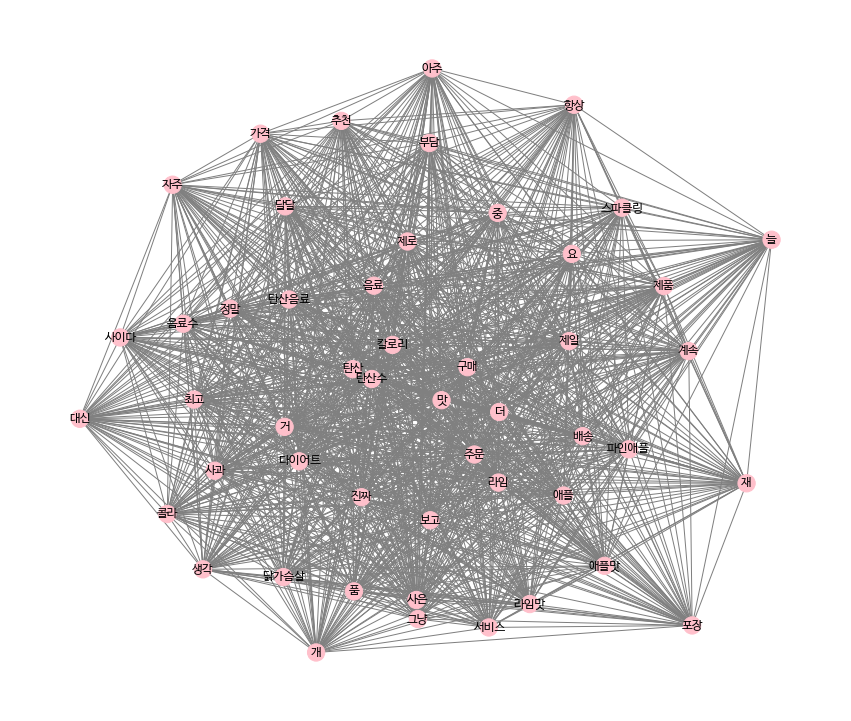

In [ ]:
# 추가 수정
# 중요노드 개수 상한

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 노드의 degree에 따라 color 다르게 설정하기
color_map = []
for node in G:
    if G.degree(node) >= 40:   # 중요한 노드 (degree가 30 이상)
        color_map.append('pink') 
    else: 
        color_map.append('beige')    

plt.figure(figsize=(15, 13))

pos = nx.spring_layout(G)  # spring layout 사용
nx.draw_networkx(G, pos, node_color=color_map, edge_color='grey', font_family='NanumBarunGothic')

plt.axis('off') # turn off axis 
plt.show()